In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


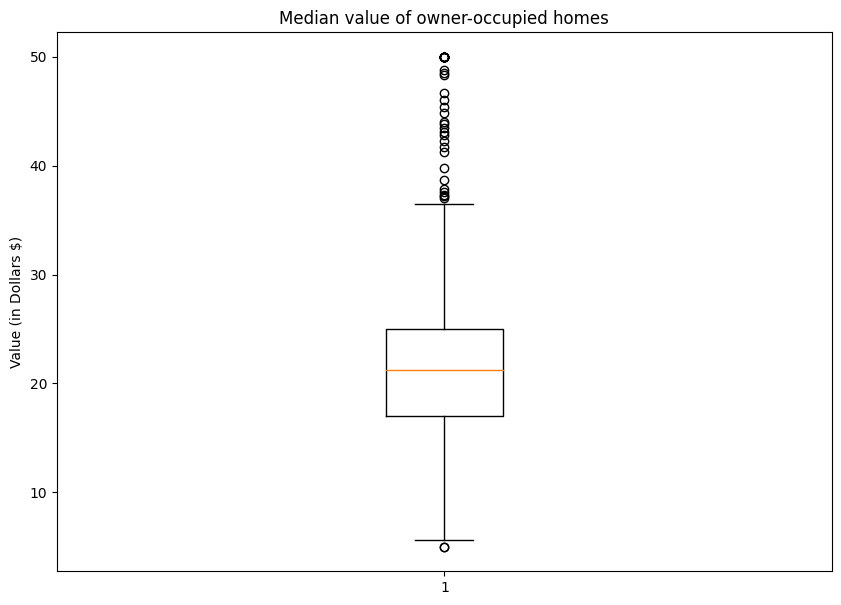

In [4]:
data = boston_df["MEDV"]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
plt.title("Median value of owner-occupied homes")
plt.ylabel("Value (in Dollars $)")

 
# show plot
plt.show()

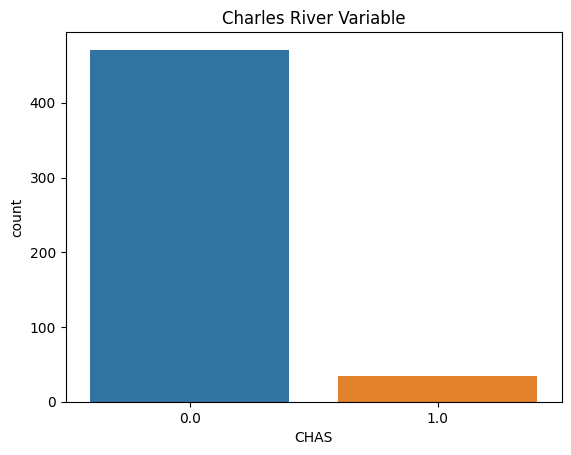

In [5]:
# boxplot 

xVal = boston_df["CHAS"]
sns.countplot(x=xVal)
plt.title("Charles River Variable")
plt.show()

Text(0, 0.5, 'Median Value')

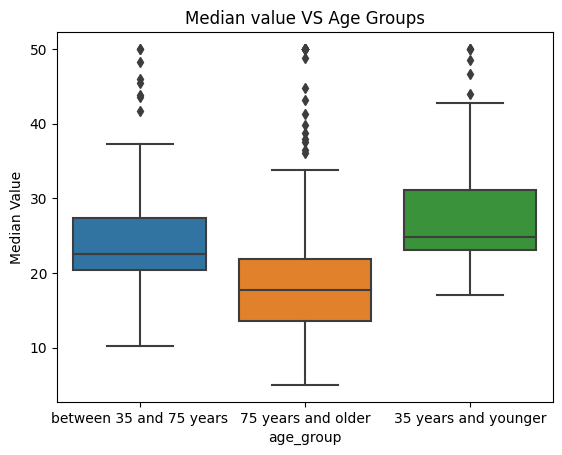

In [6]:
# boxplot MEDV vs AGE

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 75), 'age_group'] = 'between 35 and 75 years'
boston_df.loc[(boston_df['AGE'] >= 75), 'age_group'] = '75 years and older'

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("Median value VS Age Groups")
plt.ylabel("Median Value")

Text(0.5, 0, 'NOX (in ppm)')

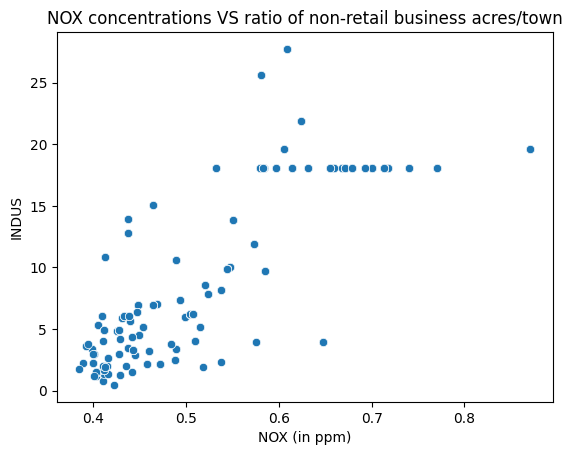

In [7]:
sns.scatterplot(data=boston_df, x="NOX", y="INDUS")
plt.title("NOX concentrations VS ratio of non-retail business acres/town")
plt.xlabel("NOX (in ppm)")

Text(0.5, 1.0, 'Pupil-teacher Ratio')

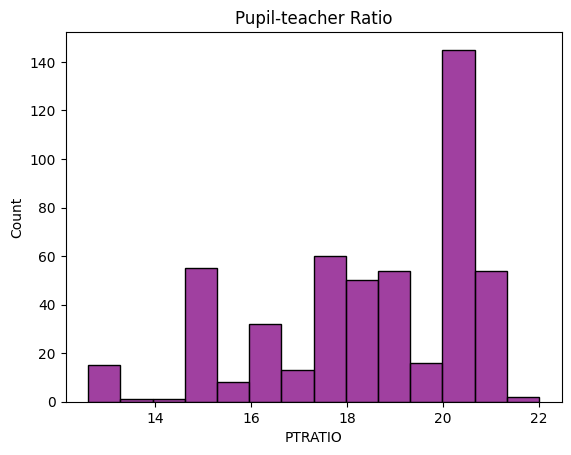

In [8]:
sns.histplot(boston_df["PTRATIO"], color='purple', kde=False) 
plt.title("Pupil-teacher Ratio")

#1 State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river or not.")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river or not.")

In [9]:
# T-test for independent samples

Sample1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
Sample2 = boston_df[boston_df['CHAS'] != 1]['MEDV']

scipy.stats.ttest_ind(Sample1, Sample2, equal_var=True)


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

#1 
Due to the p-value being <.05 we reject the null hypothesis, and there is no 

difference in median values of houses bounded by the Charles river variable or not.

#2 State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the two population means are equal)
*   $H\_1:$ At least one of the means differ

In [10]:
# ANOVA
# Is there a difference in Median values of houses (MEDV) for each proportion 
# of owner occupied units built prior to 1940 (AGE)? (ANOVA)

before_1940 = boston_df[boston_df['AGE'] > 82]['MEDV']
after_1940 = boston_df[boston_df['AGE'] <= 82]['MEDV']


f_statistic, p_value = scipy.stats.f_oneway(before_1940, after_1940)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 67.88144167271693, P-Value: 1.5083917017543382e-15


#2 Since P-value is less than .05 we reject the null hypothesis, and that there 

are a difference in median values of homes for each proportion

of owner occupied units built prior to 1940.

In [11]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'age_group'],
      dtype='object')

#3 State the hypothesis:

*   $H\_0:$  Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$  Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [12]:
#Pearson 
scipy.stats.pearsonr(boston_df['NOX'], boston_df['PTRATIO'])


PearsonRResult(statistic=0.1889326771127675, pvalue=1.8856917475764775e-05)

#3 Due to the p-value being less than alpha, .05 we reject the null hypothesis,

and can conclude there is a relationship between between Nitric oxide 

concentrations and proportion of non-retail business acres per town


#4 State the hypothesis:

*   $H\_0:$  There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
*   $H\_1:$  There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [13]:
# X is the input variables (or independent variables)
X = boston_df['DIS']
# y is the target/dependent variable
y = boston_df['MEDV']
# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.21e-08
Time:                        14:42:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#4 Due to the p-value being less than alpha .05, we reject the null hypothesis 

and can conclude there is an impact of an additional weighted distance to the 

five Boston employment centers on the median value of owner occupied homes.